In [ ]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

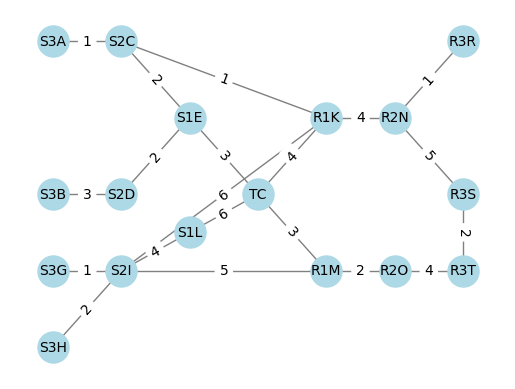

In [20]:
adj_matrix = np.zeros((17, 17), dtype=int)

adj_matrix[0, 4] = 1
adj_matrix[1, 5] = 3
adj_matrix[2, 6] = 1
adj_matrix[3, 6] = 2
adj_matrix[4, 10] = 1
adj_matrix[4, 7] = 2
adj_matrix[5, 7] = 2
adj_matrix[6, 8] = 4
adj_matrix[6, 10] = 6
adj_matrix[6, 11] = 5
adj_matrix[7, 9] = 3
adj_matrix[8, 9] = 6
adj_matrix[9, 10] = 4
adj_matrix[9, 11] = 3
adj_matrix[10, 12] = 4
adj_matrix[11, 13] = 2
adj_matrix[12, 14] = 1
adj_matrix[12, 15] = 5
adj_matrix[13, 16] = 4
adj_matrix[15, 16] = 2

# Since our graph is undirected, we have a symmetric matrix
adj_matrix = adj_matrix.T + adj_matrix

#print(adj_matrix)

pos = {0: (-3,2), 1: (-3,0), 2: (-3,-1), 3: (-3,-2), 4: (-2,2), 
       5: (-2,0), 6: (-2,-1), 7: (-1,1), 8: (-1,-0.5), 9: (0,0),
      10: (1,1), 11: (1,-1), 12: (2,1), 13: (2,-1),
      14: (3,2), 15: (3,0), 16: (3,-1)}



label_dict = {0: "S3A", 1: "S3B", 2: "S3G", 3: "S3H", 4: "S2C", 
              5: "S2D", 6: "S2I", 7: "S1E", 8: "S1L", 9: "TC",
             10: "R1K", 11: "R1M", 12: "R2N", 13: "R2O",
             14: "R3R", 15: "R3S", 16: "R3T"}

# Create the NetworkX graph
G = nx.from_numpy_array(adj_matrix)
G = nx.relabel_nodes(G, label_dict)
pos = {label_dict[old_label]: coords for old_label, coords in pos.items()}

fig, ax = plt.subplots()

nx.draw(G, pos, ax=ax, with_labels=True, node_color='lightblue', edge_color='gray', node_size=500, font_size=10)

edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)


plt.show()


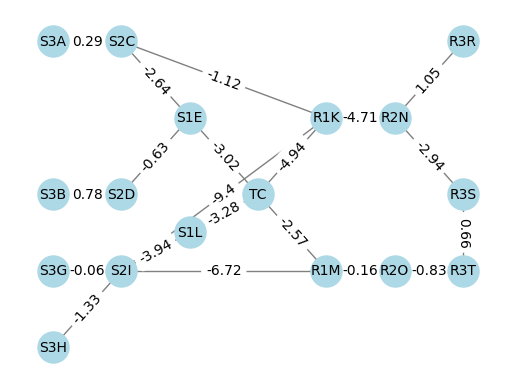

In [53]:
# We will set vertex weights equal to 1 in this computation

def compute_forman_ricci(G):
    
    # Compute forman-ricci curvature on edges
    
    for (u, v) in G.edges():
        w_e = G.get_edge_data(u, v)['weight']  
        u_neighbors = set(G.neighbors(u)) - {v} 
        v_neighbors = set(G.neighbors(v)) - {u}  

        
        ev1_sum = sum([1 / np.sqrt(w_e * G.get_edge_data(u, i)['weight']) for i in u_neighbors])
        ev2_sum = sum([1 / np.sqrt(w_e * G.get_edge_data(v, j)['weight']) for j in v_neighbors])

        curvature = w_e * (2 / w_e - (ev1_sum + ev2_sum))
        G[u][v]["formanCurvature"] = round(curvature, 2)
    return G
        
G = compute_forman_ricci(G)
fig, ax = plt.subplots()

nx.draw(G, pos, ax=ax, with_labels=True, node_color='lightblue', edge_color='gray', node_size=500, font_size=10)

edge_labels = nx.get_edge_attributes(G, 'formanCurvature')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.savefig('ricci_graph.png')
plt.show()